<a href="https://colab.research.google.com/github/beepmo/gator/blob/main/data/07-23/La2_3_gating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import userdata
import plotly.express as px


# 1. Set up project in runtime
Create colab secrets for the following credentials for the repo to get runtime files and clone repo

In [ ]:
!git config --global user.email {userdata.get('email')}
!git config --global user.name {userdata.get('name')}
!git clone https://{userdata.get('token')}@github.com/beepmo/gator
%pwd

Cloning into 'gator'...
remote: Enumerating objects: 1071, done.
remote: Counting objects: 100% (361/361), done.
remote: Compressing objects: 100% (187/187), done.
remote: Total 1071 (delta 228), reused 266 (delta 171), pack-reused 710
Receiving objects: 100% (1071/1071), 64.07 MiB | 15.25 MiB/s, done.
Resolving deltas: 100% (597/597), done.
Updating files: 100% (142/142), done.


'/content'

### 23-07-24 La2/3 gating

Gate voltage parameters :
- Amp : 1Vpp
- Offset : 500 mV
- Duty Cycle : 1%



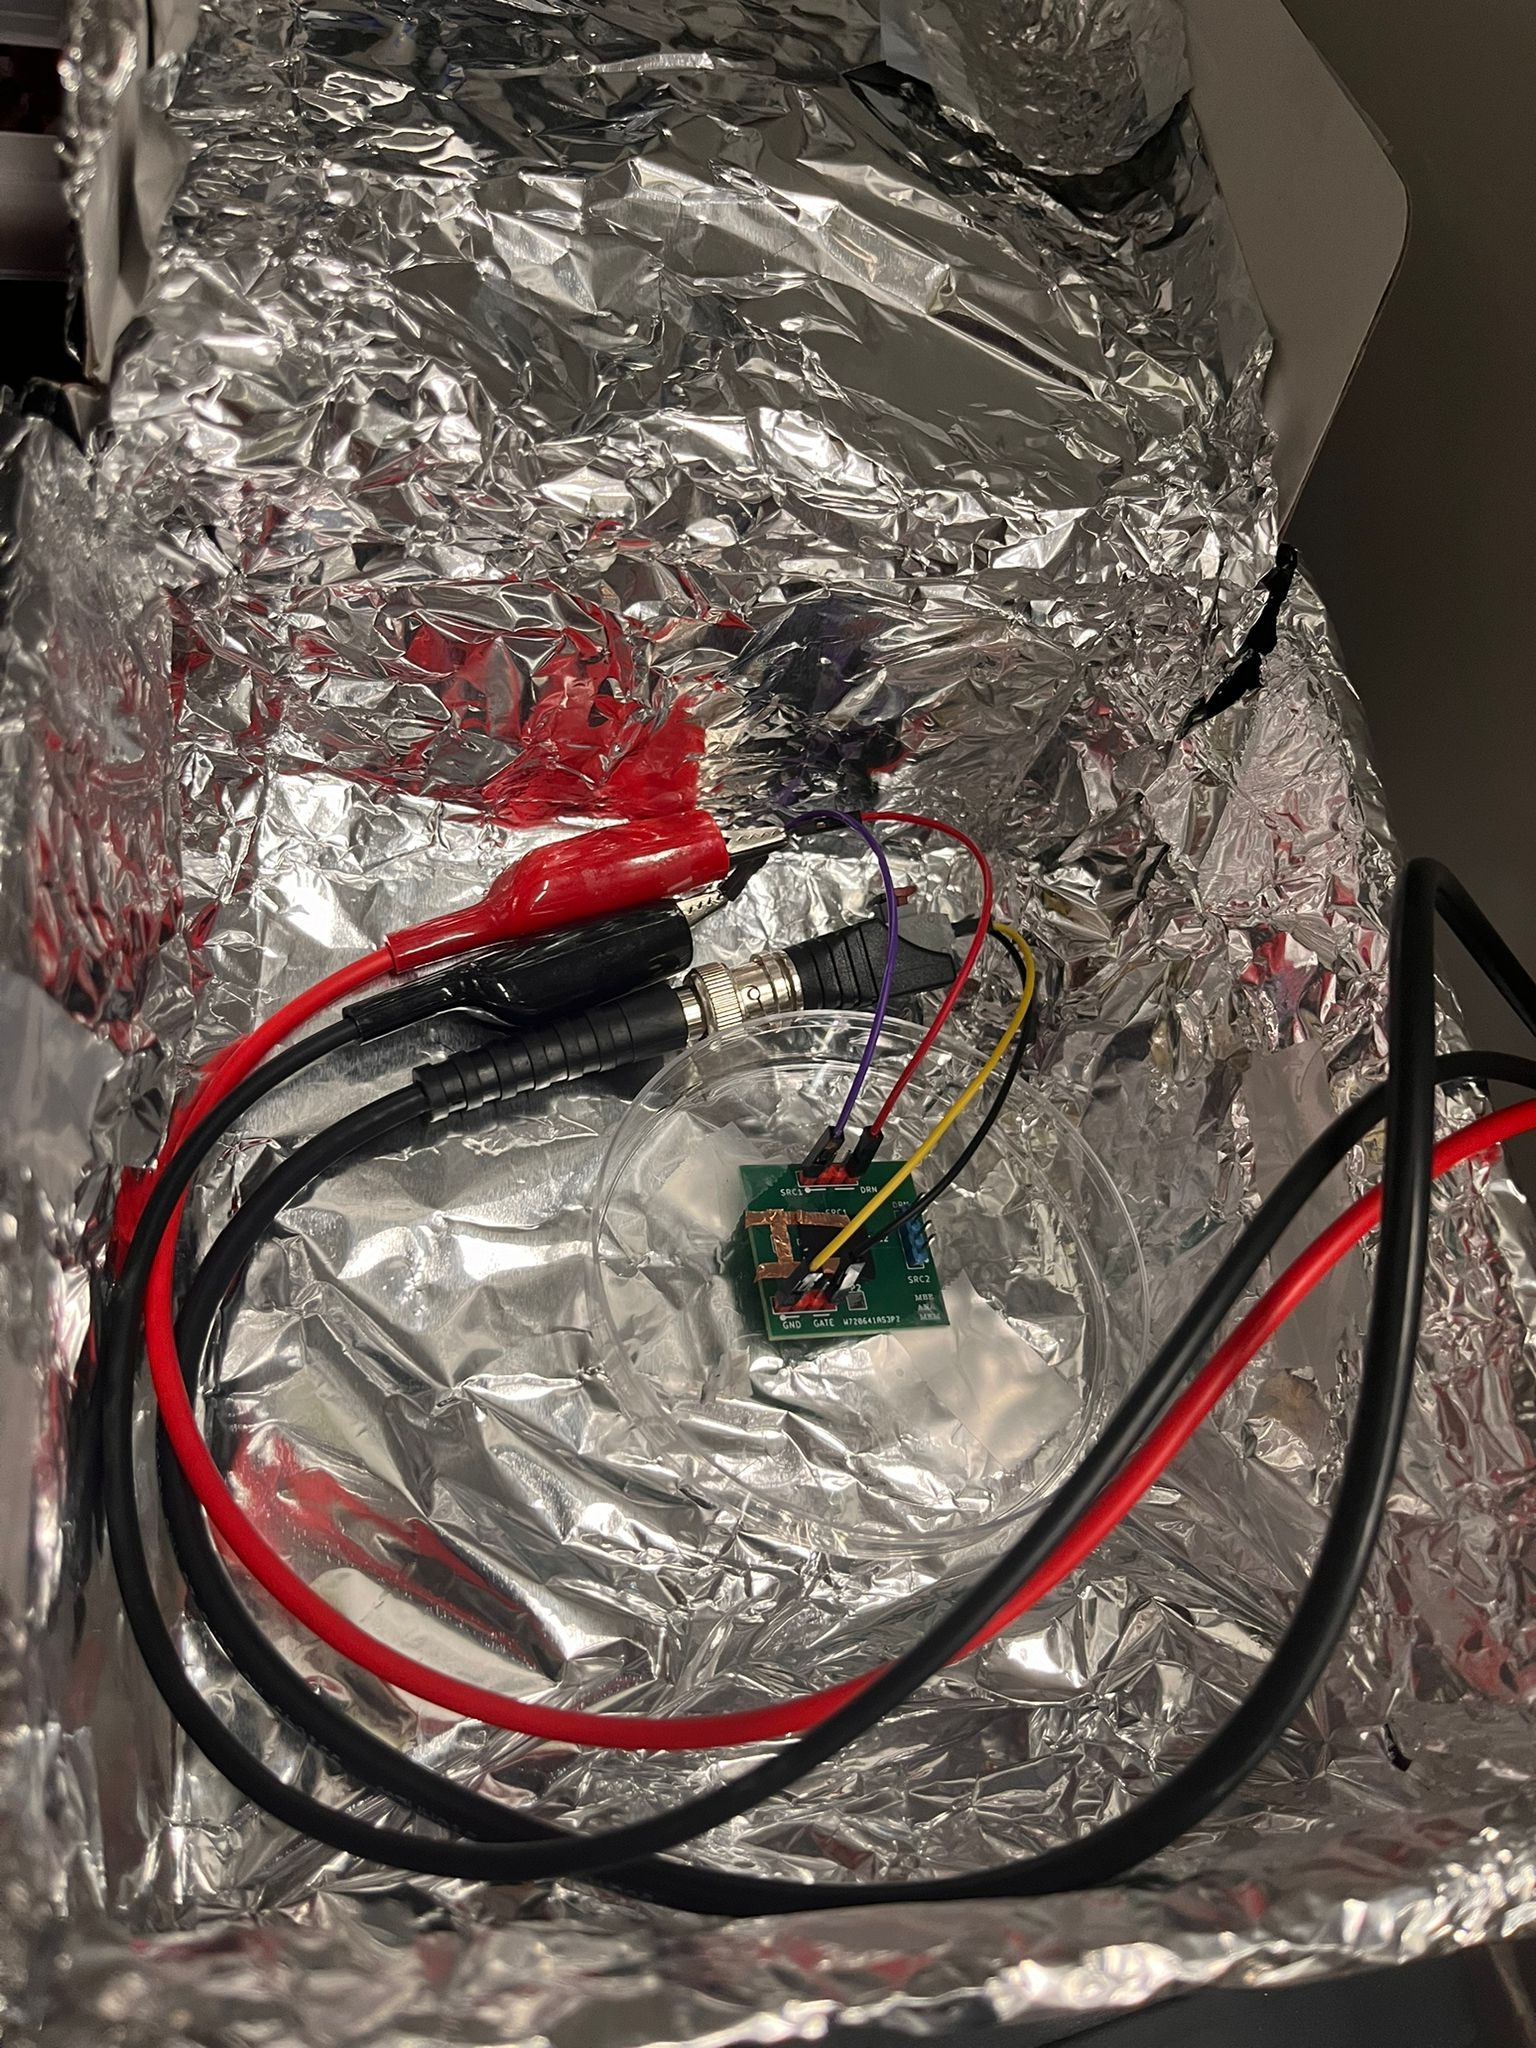

# Sample A

In [ ]:
%cd "/content/gator/data/07-23/"

/content/gator/data/07-23


In [ ]:
# prompt: delete first 8 lines from full_buffer.csv

def prep_csv(filename):

  # Read the full buffer into a list of lines
  with open(filename, 'r') as f:
    lines = f.readlines()

  # print base time
  print(lines[2])

  # Delete the first 8 lines
  lines = lines[8:]

  # Write the remaining lines back to the file
  with open(filename, 'w') as f:
    f.writelines(lines)

In [ ]:
prep_csv('defbuffer1_0724_101033.csv')
df = pd.read_csv('defbuffer1_0724_101033.csv')


Fill Mode,1



In [ ]:
df

,Reading,Unit,Range Digits,Disp Digits,Math,Start Group,Limit1 High,Limit1 Low,Limit2 High,Limit2 Low,...,Questionable,Origin,Value,Unit.1,Digits,Output,Sense,Source Limit,Overtemp,Relative Time
0,5.928114e-07,Amp DC,0.000001,5.5,F,F,F,F,F,F,...,F,Main,0.001001,Volt DC,0.01,T,2W,F,F,0.000000
1,5.913677e-07,Amp DC,0.000001,5.5,F,F,F,F,F,F,...,F,Main,0.000999,Volt DC,0.01,T,2W,F,F,0.069363
2,5.930915e-07,Amp DC,0.000001,5.5,F,F,F,F,F,F,...,F,Main,0.001001,Volt DC,0.01,T,2W,F,F,0.138721
3,5.923760e-07,Amp DC,0.000001,5.5,F,F,F,F,F,F,...,F,Main,0.001000,Volt DC,0.01,T,2W,F,F,0.208045
4,5.917892e-07,Amp DC,0.000001,5.5,F,F,F,F,F,F,...,F,Main,0.001000,Volt DC,0.01,T,2W,F,F,0.277400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15126,5.906114e-07,Amp DC,0.000001,5.5,F,F,F,F,F,F,...,F,Main,0.001000,Volt DC,0.01,T,2W,F,F,1048.836135
15127,5.904947e-07,Amp DC,0.000001,5.5,F,F,F,F,F,F,...,F,Main,0.001001,Volt DC,0.01,T,2W,F,F,1048.905458
15128,5.902203e-07,Amp DC,0.000001,5.5,F,F,F,F,F,F,...,F,Main,0.001000,Volt DC,0.01,T,2W,F,F,1048.974804
15129,5.896821e-07,Amp DC,0.000001,5.5,F,F,F,F,F,F,...,F,Main,0.001000,Volt DC,0.01,T,2W,F,F,1049.044143


In [ ]:
# Time (s)
T = df['Relative Time']

# Current (nA)
I = df['Reading'] * 1e9

# Potential (mV)
V = df['Value'] * 1e3

Text(0.5, 0, 'Time (s)')

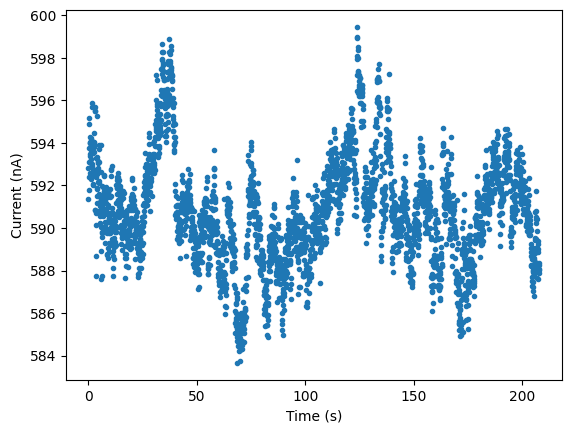

In [ ]:
cut1 = 0
cut2 = 3000
plt.plot(T[cut1:cut2],I[cut1:cut2],'.')
plt.ylabel('Current (nA)')
plt.xlabel('Time (s)')

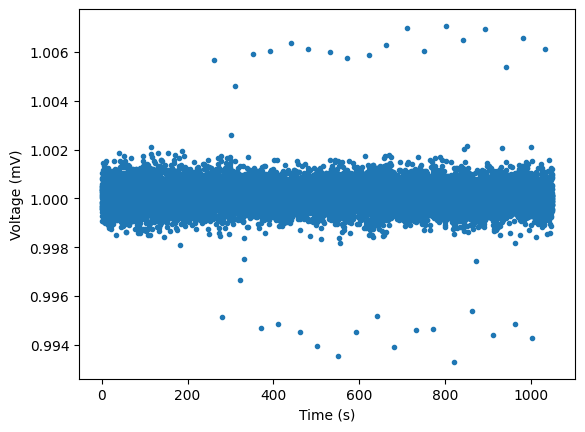

In [ ]:
cut1 = 0
cut2 = None  # Set to None to include the entire array
plt.plot(T[cut1:cut2], V[cut1:cut2], '.')
plt.ylabel('Voltage (mV)')
plt.xlabel('Time (s)')
plt.show()

Sample resistance should be ~100Ω but measured 1e4Ω.